**Kaggle**

https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression/data

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

<Axes: xlabel='Temp', ylabel='Sales'>

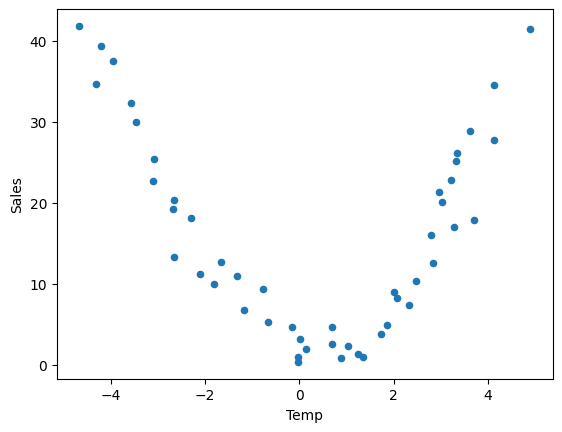

In [2]:
ice_cream = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1HW4FQzbPHtZZlM9qamIi0ETS2XRSKYQV')

ice_cream.rename(columns={'Ice Cream Sales (units)': 'Sales',
                          'Temperature (°C)': 'Temp'}, inplace=True)
ice_cream.plot.scatter(x='Temp', y='Sales')

In [39]:
X = ice_cream['Temp'].to_numpy().reshape(-1, 1)
y = ice_cream['Sales'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = Ridge(alpha=0)
model.fit(X_train_poly, y_train)
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

print(f'RMSE_test: {root_mean_squared_error(y_test, y_pred_test)}',
      f'\nRMSE_train: {root_mean_squared_error(y_train, y_pred_train)}',
      f'\nR2: {r2_score(y_test, y_pred_test)}',
      f'\nMAE_test: {mean_absolute_error(y_test, y_pred_test)}',
      f'\nMAE_train: {mean_absolute_error(y_train, y_pred_train)}')
print(model.coef_)

RMSE_test: 3.857304297171989 
RMSE_train: 2.9993111871720197 
R2: 0.8430551371938839 
MAE_test: 3.2299819836597288 
MAE_train: 2.5993732834161145
[ 0.         -0.70641926  1.87145125]


<Axes: >

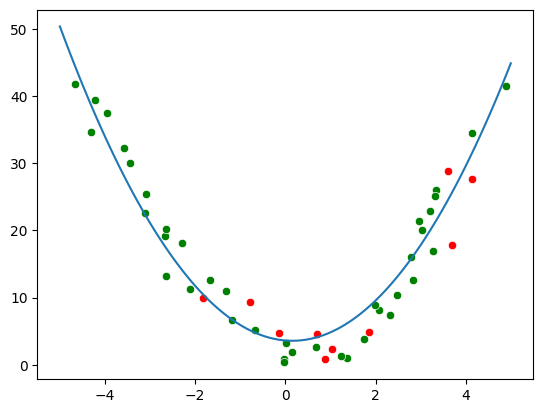

In [26]:
X_new = np.linspace(-5, 5, 100).reshape(-1, 1)
X_new_poly = poly.fit_transform(X_new)
y_pred_new = model.predict(X_new_poly)

sns.scatterplot(x=X_train.ravel(), y=y_train.ravel(), c='green')
sns.scatterplot(x=X_test.ravel(), y=y_test.ravel(), c='red')
sns.lineplot(x=X_new.ravel(), y=y_pred_new)

In [5]:
ice_cream.head()

,Temp,Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
